In [1]:
import pandas as pd
#from dataprep.eda import create_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import matplotlib.dates as md
from dotenv import load_dotenv
#from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore')

In [2]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

# Dataset details
The dataset consists of actigraphy data collected from 23 unipolar and bipolar depressed patients (condition group). In addition, the dataset contains actigraphy data from 32 non-depressed contributors (control group), consisting of 23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms.

- number (patient identifier)
- days (number of days of measurements)
- gender (1 or 2 for female or male)
- age (age in age groups)
- afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
- melanch (1: melancholia, 2: no melancholia)
- inpatient (1: inpatient, 2: outpatient), inpatient means hospitalized
- edu (education grouped in years)
- marriage (1: married or cohabiting, 2: single)
- work (1: working or studying, 2: unemployed/sick leave/pension)
- madrs1 (MADRS score when measurement started)
- madrs2 (MADRS when measurement stopped).

In [3]:
df = pd.read_csv('..\data\depresjon\scores.csv')
df['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,Male,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,Female,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,Male,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,Male,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [4]:
df['age'].value_counts()

age
45-49    9
50-54    9
35-39    7
25-29    7
30-34    7
20-24    6
40-44    5
60-64    2
65-69    2
55-59    1
Name: count, dtype: int64

In [5]:
df['age1'] = df['age'].apply(lambda x: '<=45' if int(x.split('-')[0]) < 45 else '>45')

In [6]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age1
0,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45
1,condition_2,18,Male,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,<=45
2,condition_3,13,Female,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,>45
3,condition_4,13,Male,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,<=45
4,condition_5,13,Male,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,>45
5,condition_6,7,Female,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,<=45
6,condition_7,11,Female,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,<=45
7,condition_8,5,Male,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,<=45
8,condition_9,13,Male,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45
9,condition_10,9,Male,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,>45


In [7]:
#create_report(df).show_browser()

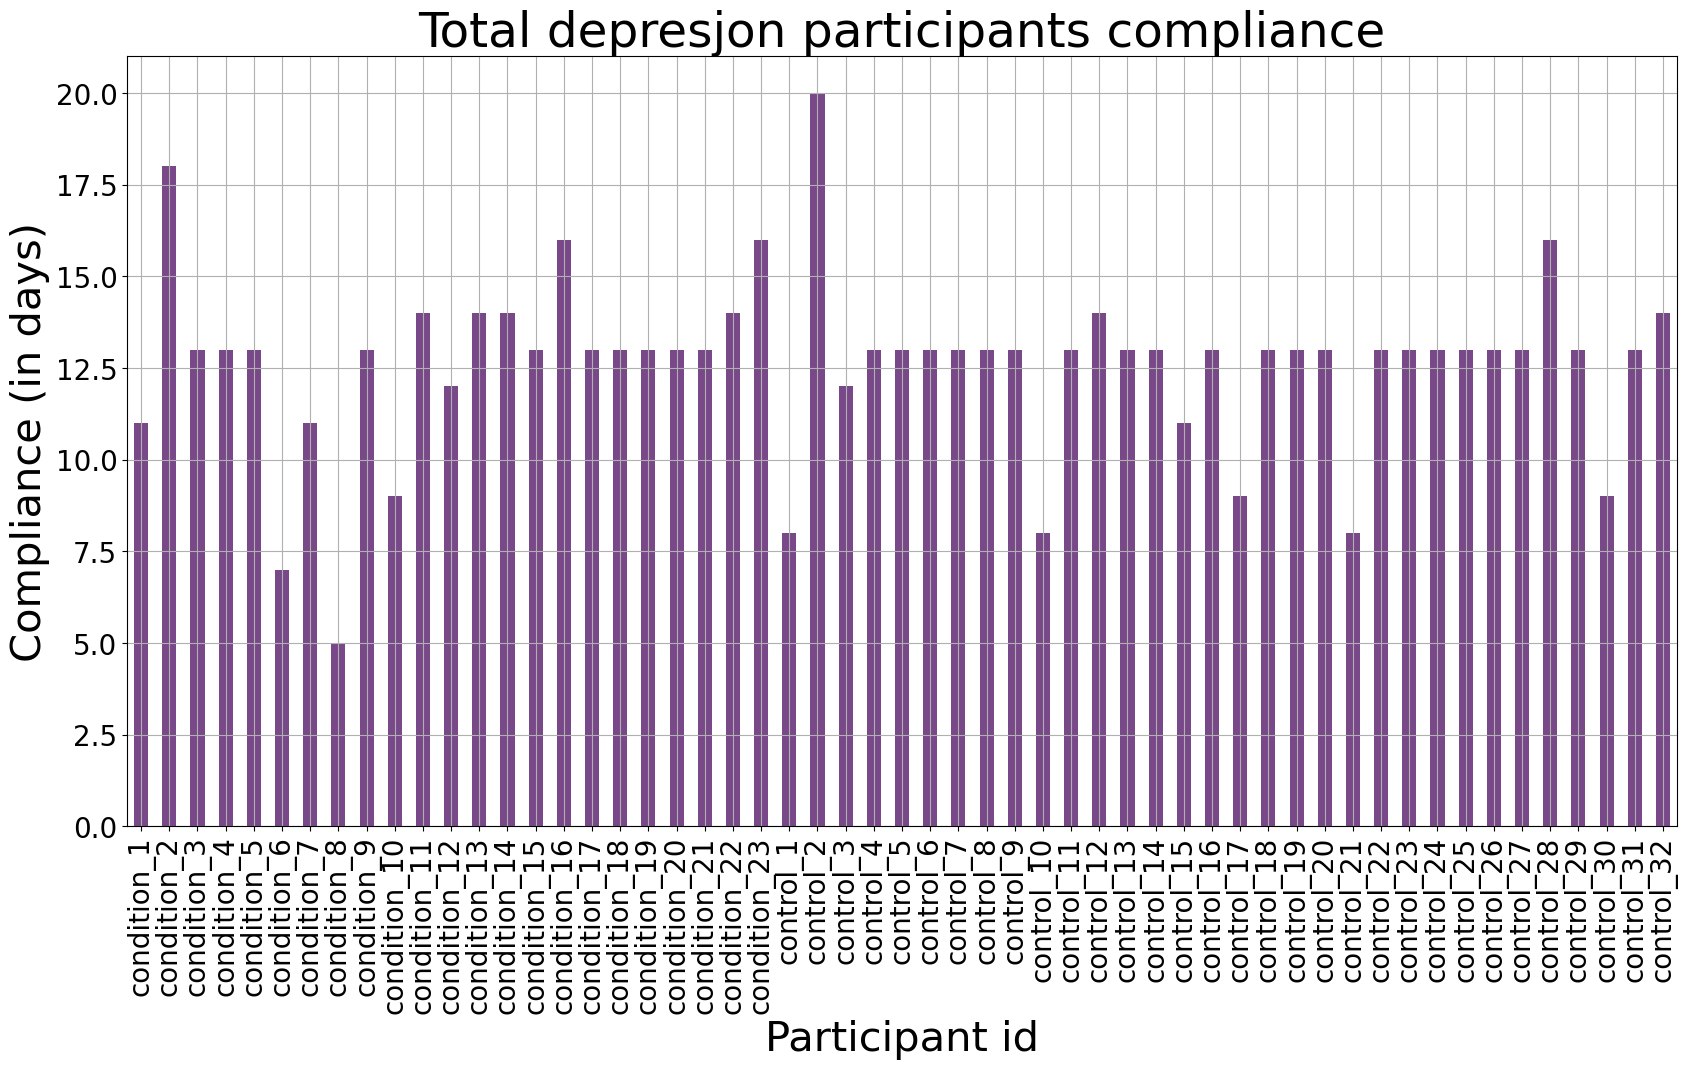

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
df.plot(x="number", y=["days"], kind="bar",ax=ax, color=custom_colors)
plt.xlabel('Participant id')
plt.ylabel('Compliance (in days)')
plt.title('Total depresjon participants compliance')
plt.grid()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.legend_.remove()
plt.savefig("../visualizations/depresjon/compliance_per_participant.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/compliance_per_participant.eps",bbox_inches='tight')
plt.show()

In [9]:
def basic_stats(df, column='days'): # Calculate column's min, max, mean, and median
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()
    median_value = df[column].median()

    print("--------------------------------------")
    print(f"Min Compliance: {min_value} days")
    print(f"Max Compliance: {max_value} days")
    print(f"Mean Compliance: {mean_value} days")
    print(f"Median Compliance: {median_value} days")
    print("--------------------------------------")

    return

print("Compliance statistics for all depresjon users")
basic_stats(df)
# Separate condition and control groups
condition_df = df[df['number'].str.startswith('condition')]
control_df = df[df['number'].str.startswith('control')]
print("Compliance statistics for condition group")
basic_stats(condition_df)
print("Compliance statistics for control group")
basic_stats(control_df)

Compliance statistics for all depresjon users
--------------------------------------
Min Compliance: 5 days
Max Compliance: 20 days
Mean Compliance: 12.6 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for condition group
--------------------------------------
Min Compliance: 5 days
Max Compliance: 18 days
Mean Compliance: 12.652173913043478 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for control group
--------------------------------------
Min Compliance: 8 days
Max Compliance: 20 days
Mean Compliance: 12.5625 days
Median Compliance: 13.0 days
--------------------------------------


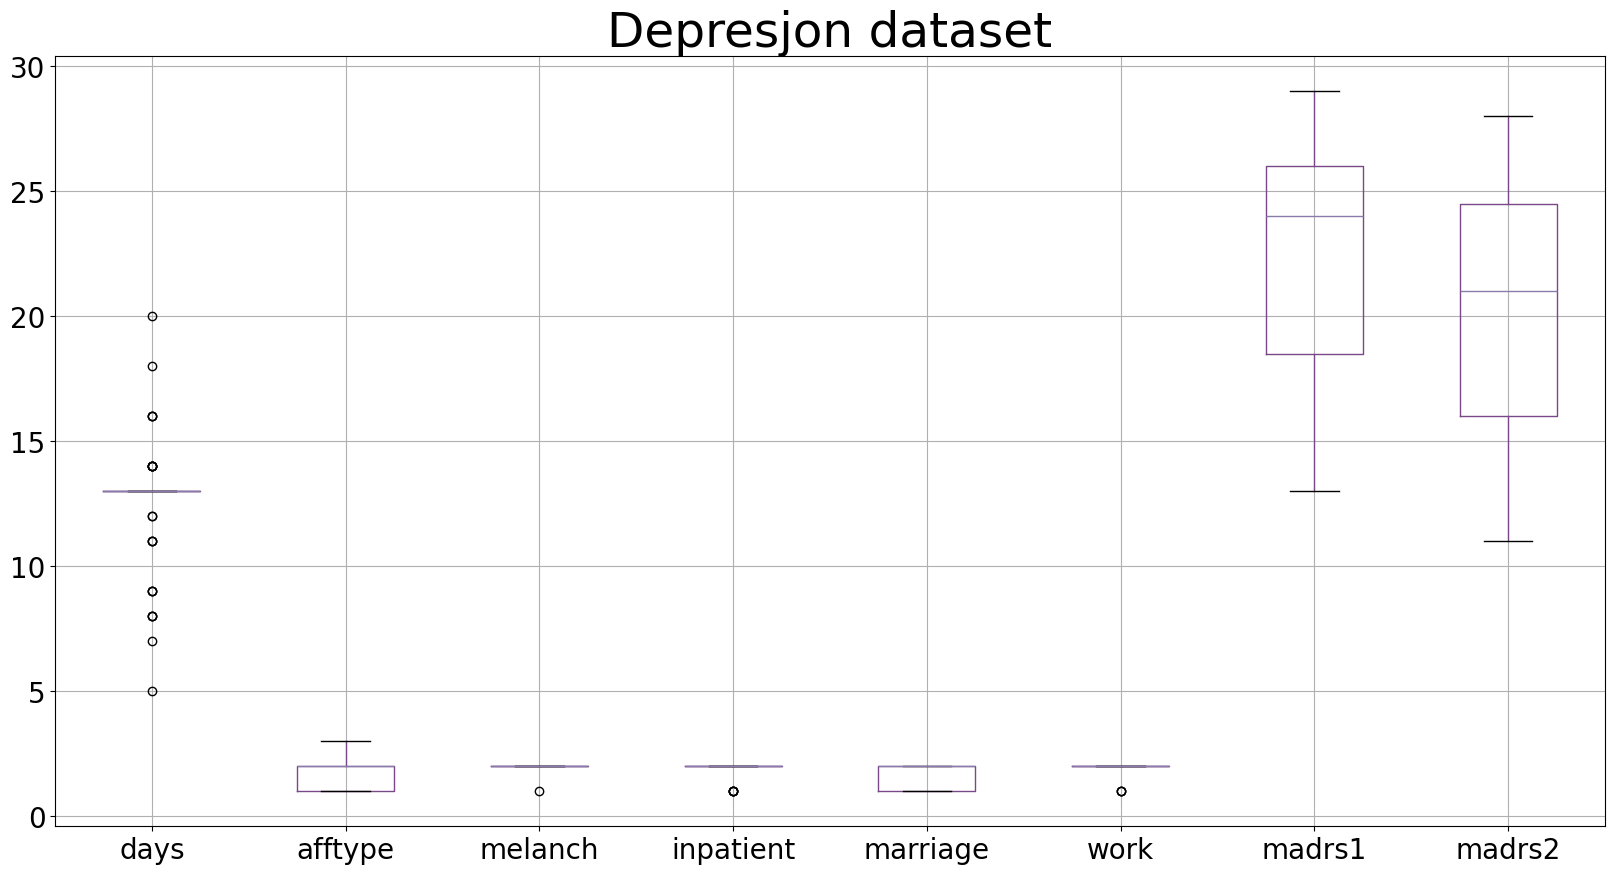

In [10]:
# a box plot for outlier visualization
df.boxplot(figsize=(20,10))
plt.title("Depresjon dataset")
plt.savefig("../visualizations/depresjon/boxplots.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/boxplots.eps",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


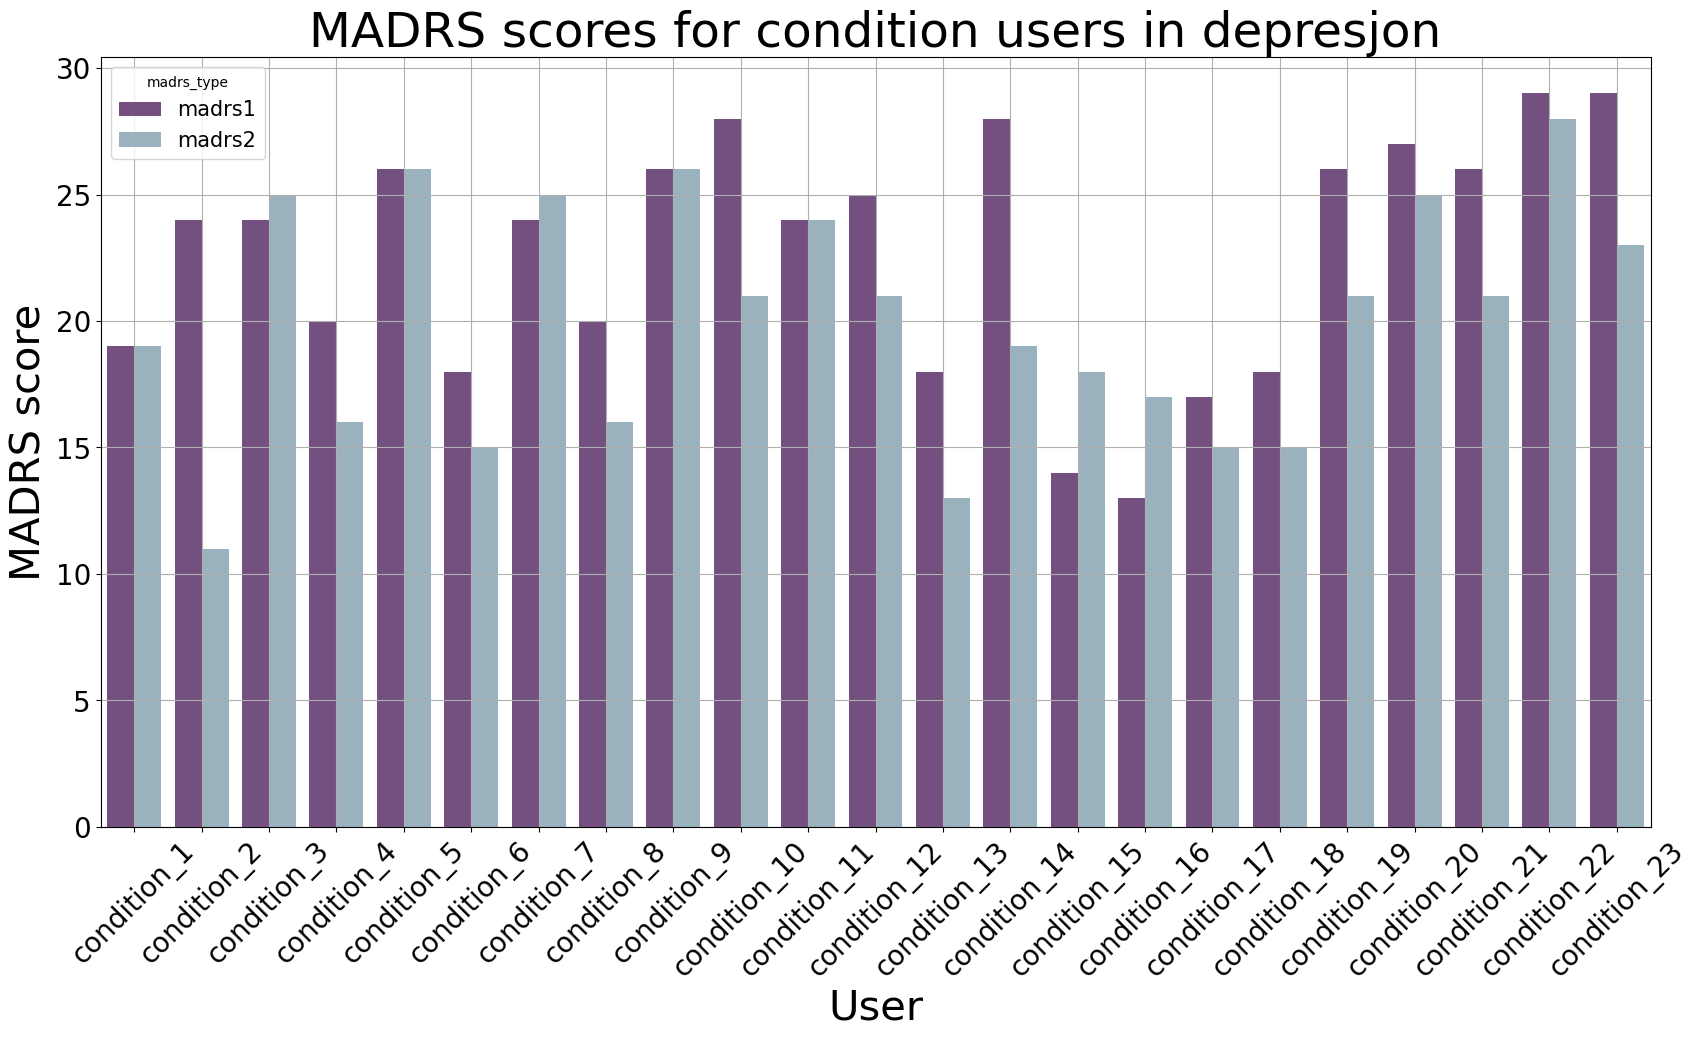

In [11]:
# Melt the DataFrame to 'long' format for seaborn
df_long = pd.melt(condition_df, id_vars=['number'], value_vars=['madrs1', 'madrs2'], var_name='madrs_type',value_name='madrs_value')

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='number', y='madrs_value', hue='madrs_type', data=df_long)
plt.title('MADRS scores for condition users in depresjon')
plt.xlabel('User')
plt.ylabel('MADRS score')
plt.xticks(rotation=45)
plt.grid()
plt.savefig("../visualizations/depresjon/madrs_scores.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/madrs_scores.eps",bbox_inches='tight')
plt.show()

In [12]:
df['madrs_mean'] = df[['madrs1', 'madrs2']].mean(axis=1)
condition_df['madrs_mean'] = condition_df[['madrs1', 'madrs2']].mean(axis=1)

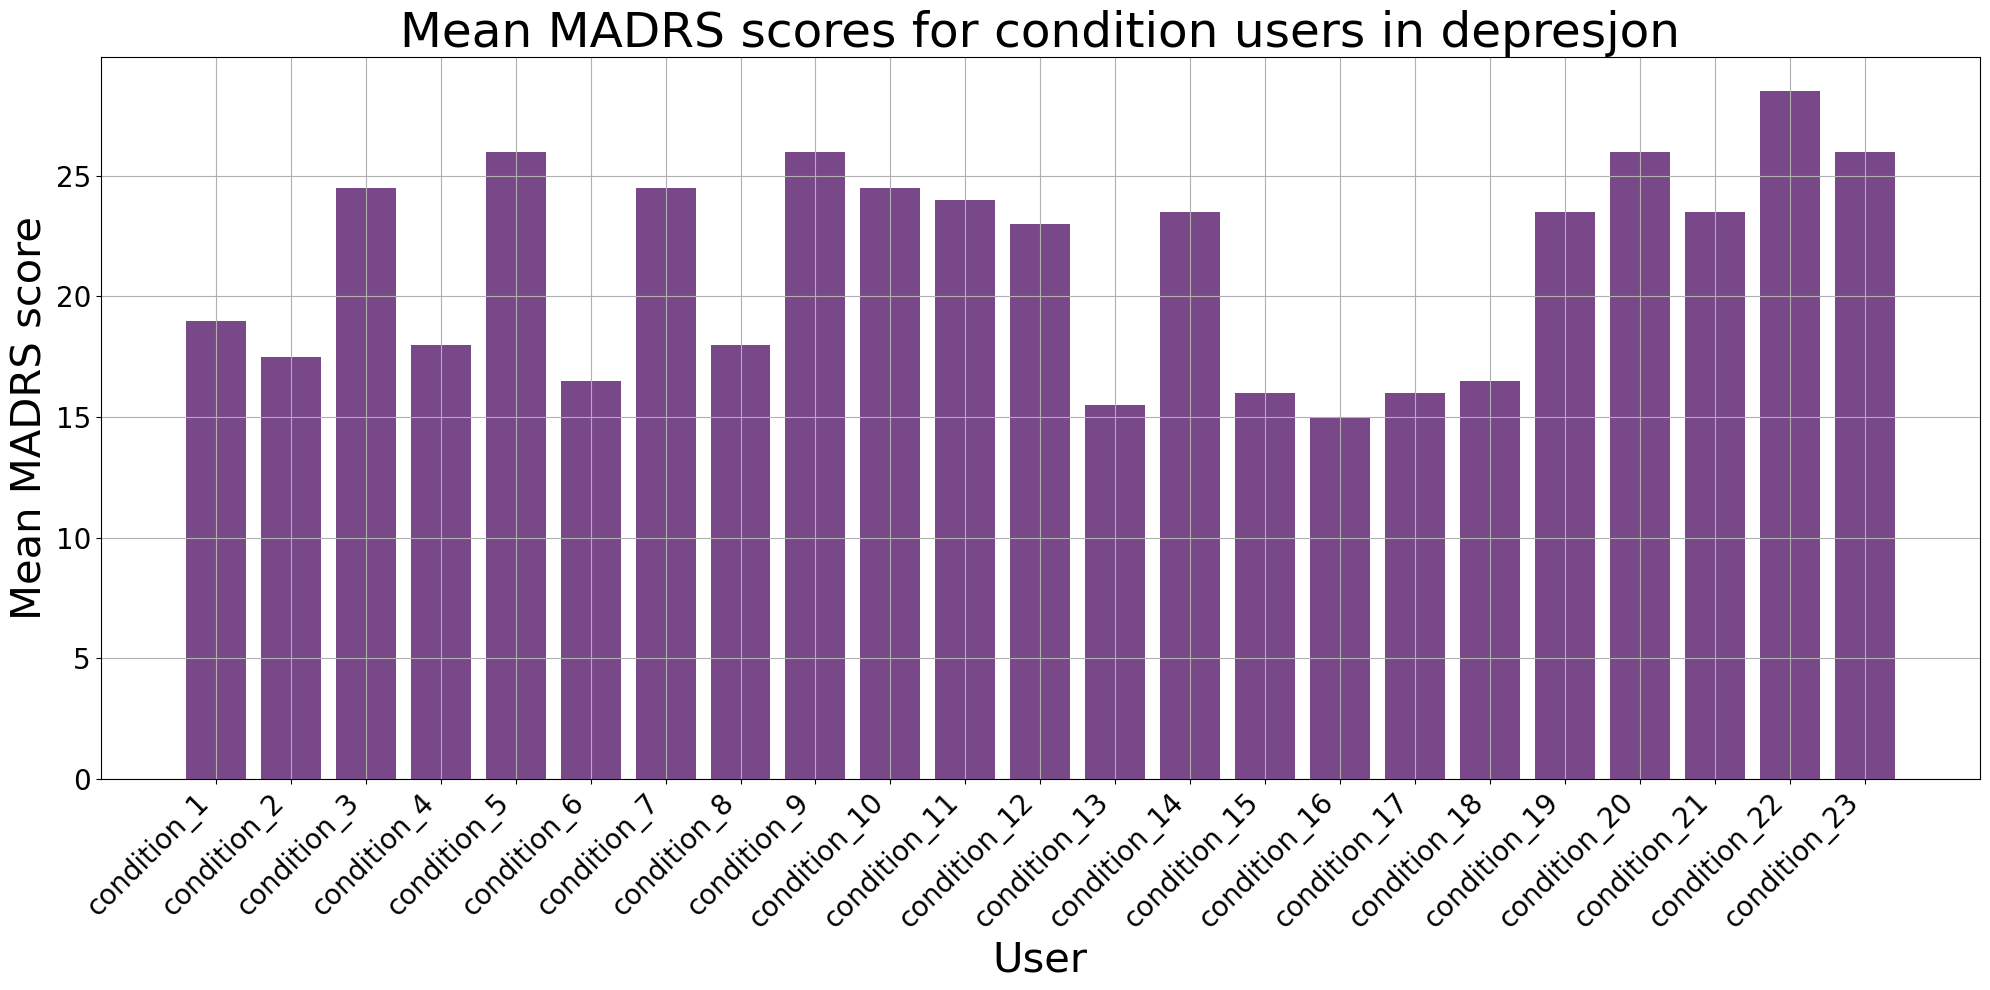

In [13]:
plt.figure(figsize=(20,10))
plt.bar(condition_df['number'], condition_df['madrs_mean'])
plt.xlabel('User')
plt.ylabel('Mean MADRS score')
plt.title('Mean MADRS scores for condition users in depresjon')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.savefig("../visualizations/depresjon/madrs_scores_mean.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/madrs_scores_mean.eps",bbox_inches='tight')
plt.show()

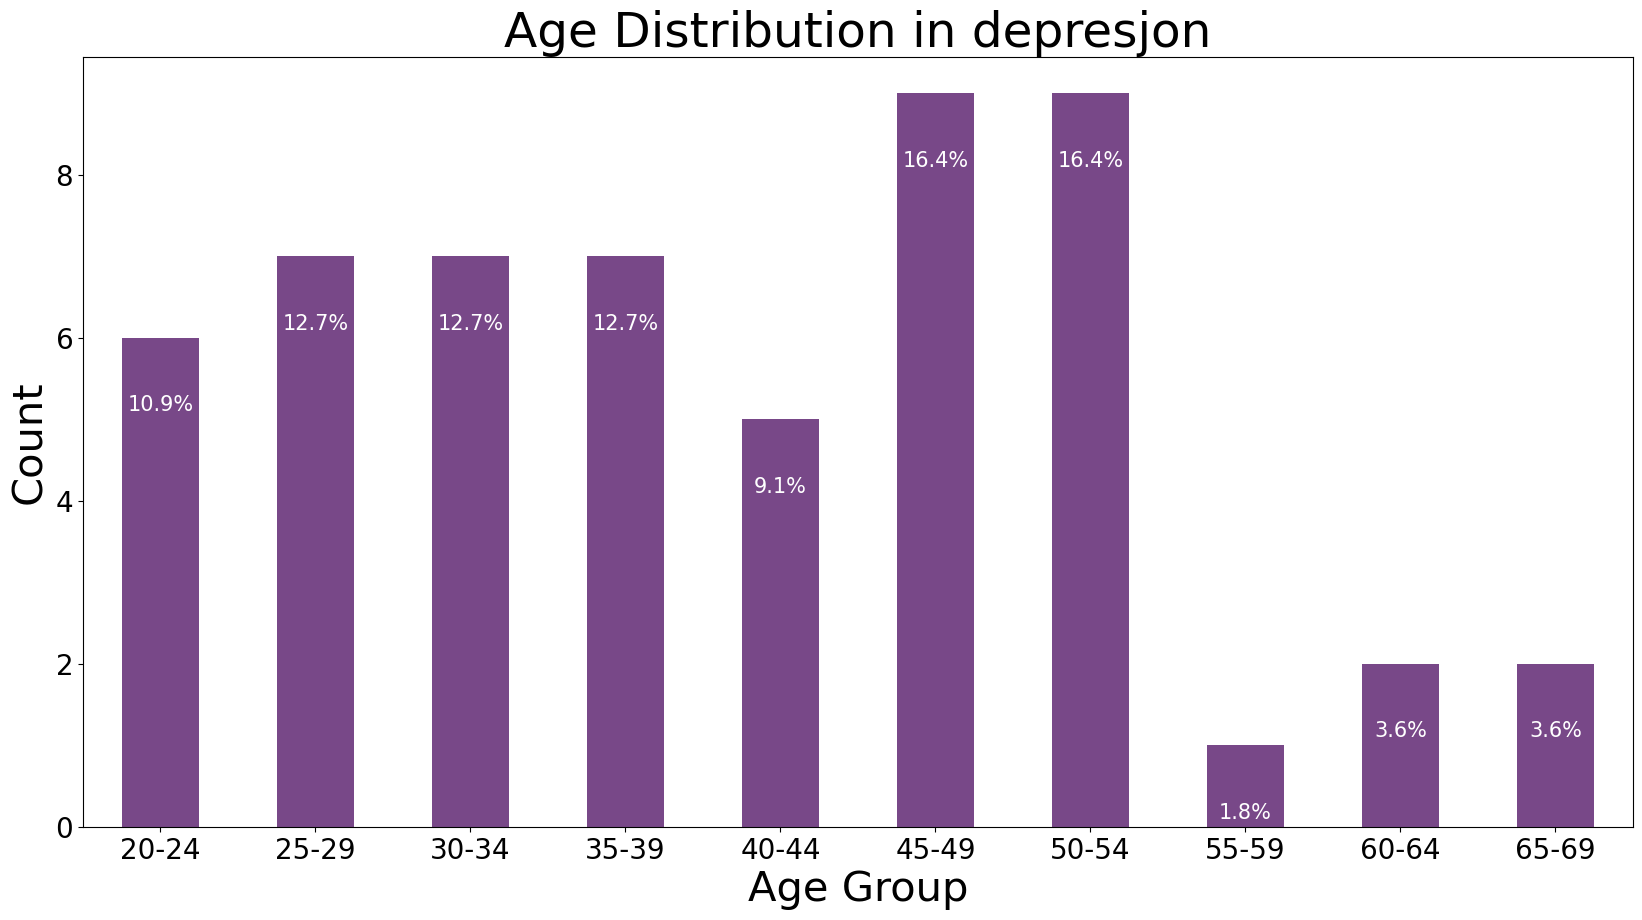

In [14]:
plt.figure(figsize=(20, 10))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution in depresjon')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Adding percentages on top of each bar
gender_counts = df['age'].value_counts().sort_index()
total = gender_counts.sum()
for i, count in enumerate(gender_counts):
    plt.text(i, count - 0.7, f'{(count / total) * 100:.1f}%', ha='center', va='top', color='white', fontsize=15)
plt.savefig("../visualizations/depresjon/age.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/age.eps",bbox_inches='tight')
plt.show()

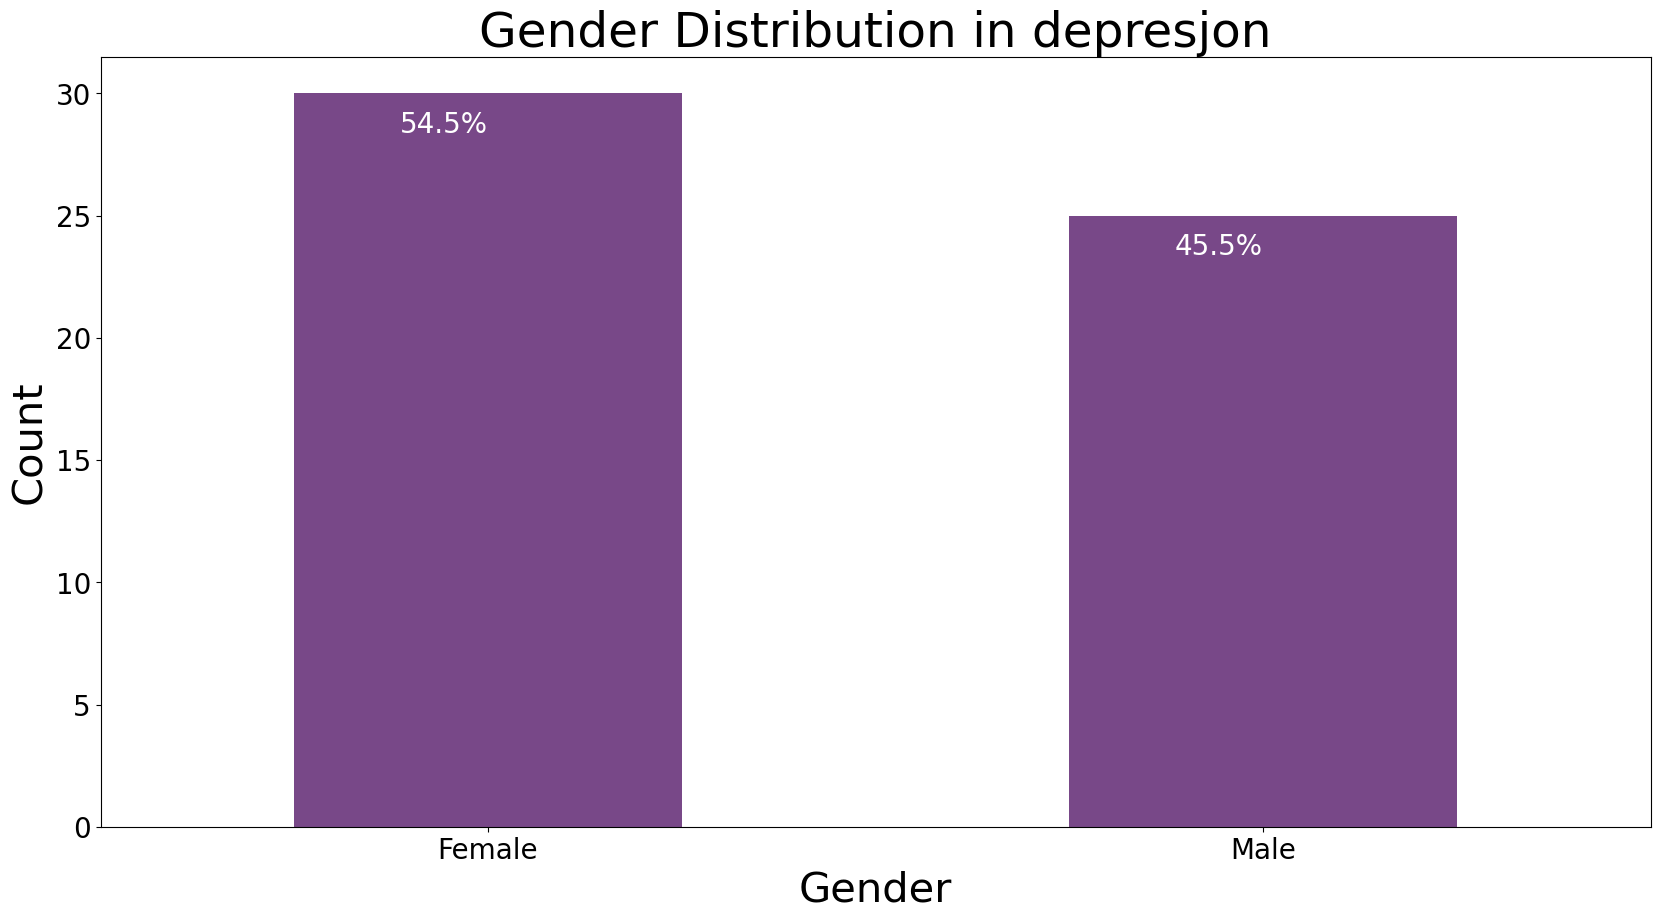

In [15]:
plt.figure(figsize=(20, 10))
df['gender'].value_counts().sort_index().plot(kind='bar')
plt.title('Gender Distribution in depresjon')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Adding percentages on top of each bar
gender_counts = df['gender'].value_counts().sort_index()
total = gender_counts.sum()
for i, count in enumerate(gender_counts):
    plt.text(i, count - 0.7, f'{(count / total) * 100:.1f}%', ha='right', va='top', color='white', fontsize=20)
plt.savefig("../visualizations/depresjon/gender.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/gender.eps",bbox_inches='tight')
plt.show()

In [16]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=custom_colors)
    ax1.set_title('Count plot of ' + y_var + ' in depresjon')

    #------------PERCENTAGE-------------------
    def autopct_format(pct):
        return f'{pct:.0f}%' if pct > 0 else ''

    wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=custom_colors, autopct=autopct_format, shadow=True, startangle=130)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(25)
    ax2.axis('equal')
    ax2.set_title('Distribution of ' + y_var + ' in depresjon')
    
    plt.savefig("../visualizations/depresjon/%s_distribution.png" % y_var, bbox_inches='tight')
    plt.savefig("../visualizations/depresjon/%s_distribution.eps" % y_var, bbox_inches='tight')

    plt.show()

In [17]:
# adds a column with the number of user - run it once
#folder_path = '..\data\depresjon\condition'
#csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

#for csv_file in csv_files:
#    file_path = os.path.join(folder_path, csv_file)
#    folder_name = os.path.splitext(csv_file)[0]
#    user_id = ''.join(filter(str.isdigit, folder_name))
#    df = pd.read_csv(file_path)
#    df['user_id'] = 'condition_%s'%user_id
#    df.to_csv(file_path, index=False)

In [18]:
# adds a column with the number of user - run it once
#folder_path = '..\data\depresjon\control'
#csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

#for csv_file in csv_files:
#    file_path = os.path.join(folder_path, csv_file)
#    folder_name = os.path.splitext(csv_file)[0]
#    user_id = ''.join(filter(str.isdigit, folder_name))
#    df = pd.read_csv(file_path)
#    df['user_id'] = 'control_%s'%user_id
#    df.to_csv(file_path, index=False)

In [19]:
folder_path = '..\data\depresjon\control'
control = pd.DataFrame()
df_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        tt = pd.read_csv(file_path)
        df_list.append(tt)

control = pd.concat(df_list, ignore_index=True)

In [20]:
folder_path = '..\data\depresjon\condition'
condition = pd.DataFrame()
df_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        tt = pd.read_csv(file_path)
        df_list.append(tt)

condition = pd.concat(df_list, ignore_index=True)

In [21]:
dt = pd.concat([condition, control], axis=0, ignore_index=True)
dt

,timestamp,date,activity,user_id
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1
...,...,...,...,...
1571701,2003-12-01 12:53:00,2003-12-01,7,control_9
1571702,2003-12-01 12:54:00,2003-12-01,7,control_9
1571703,2003-12-01 12:55:00,2003-12-01,5,control_9
1571704,2003-12-01 12:56:00,2003-12-01,5,control_9


In [22]:
dt.drop(columns=['timestamp'], inplace=True)

In [23]:
dt

,date,activity,user_id
0,2003-05-07,0,condition_1
1,2003-05-07,143,condition_1
2,2003-05-07,0,condition_1
3,2003-05-07,20,condition_1
4,2003-05-07,166,condition_1
...,...,...,...
1571701,2003-12-01,7,control_9
1571702,2003-12-01,7,control_9
1571703,2003-12-01,5,control_9
1571704,2003-12-01,5,control_9


In [24]:
participants = dt['user_id'].unique()
tt = pd.DataFrame()

# Loop through each participant
for participant in participants:
    user_df = dt[dt['user_id'] == participant]
    user_df['date'] = pd.to_datetime(user_df['date'], format='%Y-%m-%d')
    user_df['activity'] = pd.to_numeric(user_df['activity'], errors='coerce')
    resampled_activity = user_df.set_index('date')['activity'].resample('D').mean()
    resampled_user_df = user_df.drop(columns=['activity']).drop_duplicates().set_index('date')
    resampled_user_df = resampled_user_df.join(resampled_activity, how='right')
    resampled_user_df['user_id'] = participant
    tt = pd.concat([tt, resampled_user_df])

tt.reset_index(inplace=True)

tt

,date,user_id,activity
0,2003-05-07,condition_1,174.144444
1,2003-05-08,condition_1,156.247222
2,2003-05-09,condition_1,124.135417
3,2003-05-10,condition_1,134.961806
4,2003-05-11,condition_1,99.439583
...,...,...,...
1139,2003-11-27,control_9,5.781250
1140,2003-11-28,control_9,6.401389
1141,2003-11-29,control_9,6.887500
1142,2003-11-30,control_9,7.000000


In [25]:
tt.isnull().sum()

date        0
user_id     0
activity    0
dtype: int64

In [26]:
# merge with demographics
merged_df = pd.merge(tt, df, left_on='user_id', right_on='number', how='left')
merged_df

,date,user_id,activity,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age1,madrs_mean
0,2003-05-07,condition_1,174.144444,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
1,2003-05-08,condition_1,156.247222,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
2,2003-05-09,condition_1,124.135417,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
3,2003-05-10,condition_1,134.961806,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
4,2003-05-11,condition_1,99.439583,condition_1,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,control_9,5.781250,control_9,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1140,2003-11-28,control_9,6.401389,control_9,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1141,2003-11-29,control_9,6.887500,control_9,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1142,2003-11-30,control_9,7.000000,control_9,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN


In [27]:
merged_df.isnull().sum()

date            0
user_id         0
activity        0
number          0
days            0
gender          0
age             0
afftype       739
melanch       784
inpatient     739
edu            53
marriage      739
work          739
madrs1        739
madrs2        739
age1            0
madrs_mean    739
dtype: int64

In [28]:
#create_report(merged_df).show_browser()

In [29]:
merged_df.drop('number', axis=1, inplace=True)
merged_df

,date,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age1,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
1,2003-05-08,condition_1,156.247222,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
2,2003-05-09,condition_1,124.135417,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
3,2003-05-10,condition_1,134.961806,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
4,2003-05-11,condition_1,99.439583,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,control_9,5.781250,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1140,2003-11-28,control_9,6.401389,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1141,2003-11-29,control_9,6.887500,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1142,2003-11-30,control_9,7.000000,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN


In [30]:
# import the data into mongo

# Load environment variables
#try:
#    load_dotenv()
#except:
#    pass

#mongo_url = os.getenv('MONGO_URL')
#mongo_port = int(os.getenv('MONGO_PORT'))
#mongo_username = os.getenv('MONGO_USERNAME')
#mongo_password = os.getenv('MONGO_PASSWORD')
#mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
#mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

#data_dict = merged_df.to_dict("records")

# Create the client using environment variables
#client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
#db = client['depresjon-dataset']
#collection = db['depresjon']

#collection.insert_many(data_dict)

In [31]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')
merged_df

,date,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age1,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
1,2003-05-08,condition_1,156.247222,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
2,2003-05-09,condition_1,124.135417,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
3,2003-05-10,condition_1,134.961806,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
4,2003-05-11,condition_1,99.439583,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,control_9,5.781250,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1140,2003-11-28,control_9,6.401389,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1141,2003-11-29,control_9,6.887500,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN
1142,2003-11-30,control_9,7.000000,13,Male,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,<=45,NaN


In [32]:
# Group by 'user_id' and 'date' and calculate the mean activity for each day for each participant
grouped_data = merged_df.groupby(['user_id', 'date'])['activity'].mean().reset_index()

# Get a list of unique participants
participants = merged_df['user_id'].unique()

# Create a plot for each participant
for participant in participants:
    participant_data = grouped_data[grouped_data['user_id'] == participant]
    plt.figure(figsize=(20, 10))
    sns.lineplot(x='date', y='activity', data=participant_data)
    plt.title(f'Mean Daily Activity for {participant}')
    plt.xlabel('Date')
    plt.ylabel('Mean Activity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visualizations/depresjon/%s_mean_daily_activity.png'%participant,bbox_inches='tight')
    plt.savefig('../visualizations/depresjon/%s_mean_daily_activity.eps'%participant,bbox_inches='tight')
    plt.close()

In [33]:
#create_report(df).show_browser()

In [34]:
df_cleaned = merged_df.dropna(subset=['madrs_mean'])
df_cleaned

,date,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age1,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
1,2003-05-08,condition_1,156.247222,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
2,2003-05-09,condition_1,124.135417,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
3,2003-05-10,condition_1,134.961806,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
4,2003-05-11,condition_1,99.439583,11,Male,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
401,2004-06-07,condition_9,224.508333,13,Male,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
402,2004-06-08,condition_9,202.056250,13,Male,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
403,2004-06-09,condition_9,168.656250,13,Male,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0


In [35]:
df_cleaned.drop(columns=['age'], inplace=True)

In [36]:
#create_report(df_cleaned).show_browser()

In [37]:
df_cleaned.columns

Index(['date', 'user_id', 'activity', 'days', 'gender', 'afftype', 'melanch',
       'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'age1',
       'madrs_mean'],
      dtype='object')

In [38]:
df_cleaned = df_cleaned.rename(columns={'age1': 'age'})

In [39]:
df_cleaned

,date,user_id,activity,days,gender,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,age,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
1,2003-05-08,condition_1,156.247222,11,Male,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
2,2003-05-09,condition_1,124.135417,11,Male,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
3,2003-05-10,condition_1,134.961806,11,Male,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
4,2003-05-11,condition_1,99.439583,11,Male,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,<=45,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
401,2004-06-07,condition_9,224.508333,13,Male,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
402,2004-06-08,condition_9,202.056250,13,Male,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0
403,2004-06-09,condition_9,168.656250,13,Male,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,>45,26.0


In [40]:
df_cleaned.columns

Index(['date', 'user_id', 'activity', 'days', 'gender', 'afftype', 'melanch',
       'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'age',
       'madrs_mean'],
      dtype='object')

In [41]:
df_cleaned = df_cleaned[['date', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'madrs_mean']]
df_cleaned

,date,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,condition_1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,condition_1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,condition_1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,condition_1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
401,2004-06-07,condition_9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
402,2004-06-08,condition_9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
403,2004-06-09,condition_9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [42]:
df_cleaned.to_pickle("../data/depresjon/depresjon_unprocessed.pkl")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


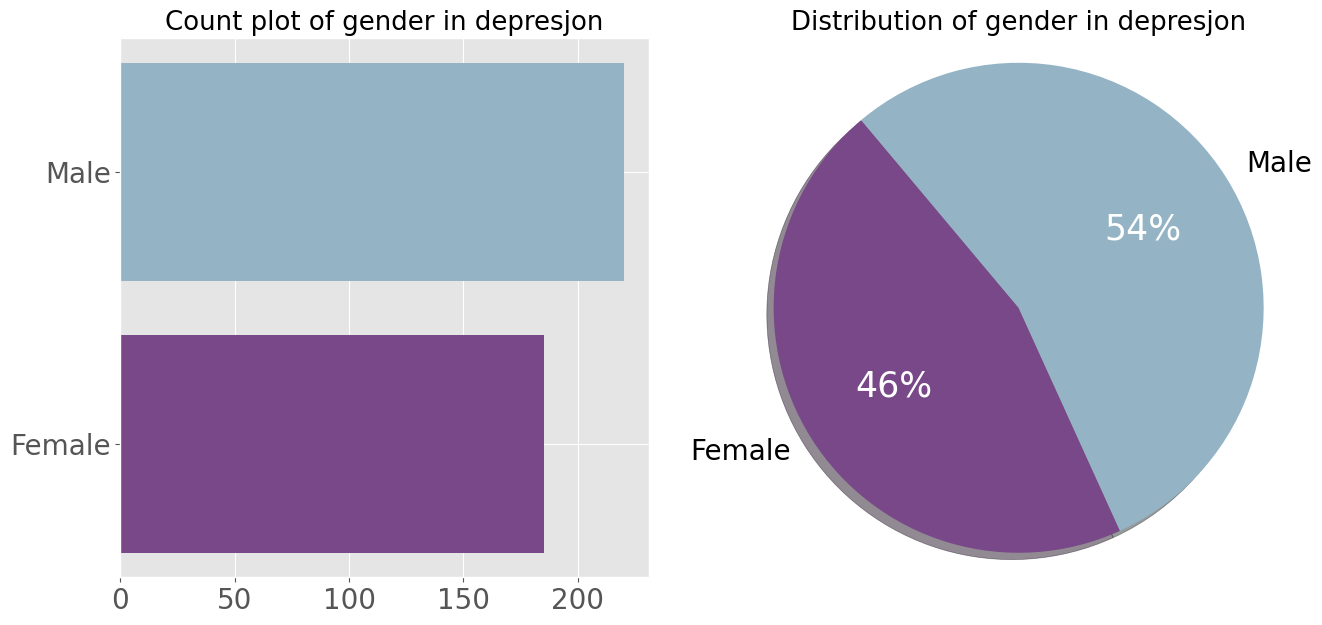

In [43]:
var = 'gender'
target_distribution(y_var=var, data=df_cleaned)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


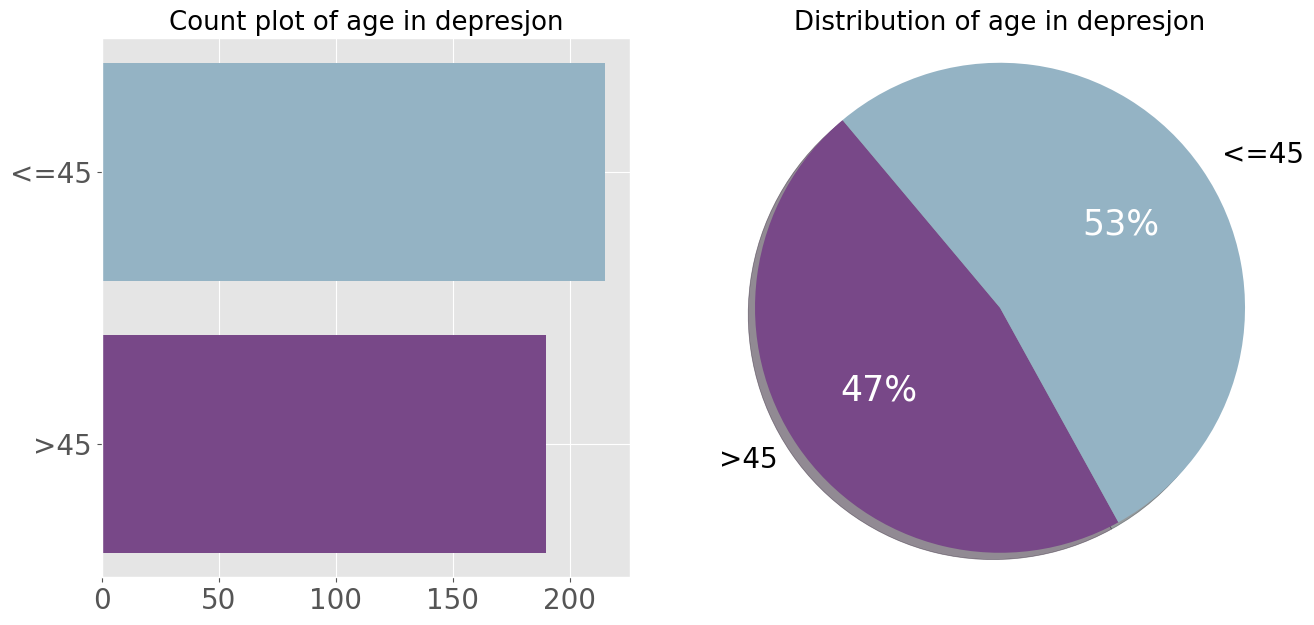

In [44]:
var = 'age'
target_distribution(y_var=var, data=df_cleaned)